In [8]:
import keras
import numpy as np

In [9]:
from keras.datasets import imdb
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words= 10000)

In [10]:
train_labels.shape
train_data.shape

(25000,)

In [11]:
max(max(item) for item in train_data)

9999

In [12]:
# word_index = imdb.get_word_index()
# reverse_word_index = ddict([(value, key) for (key, value) in word_index.items()])
# decpoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0] if i>2])
# # decoded_review

# decoded_review

In [13]:
def vectorize_sequence(sequences, dimension= 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


In [14]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [15]:
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

In [16]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [17]:
test_labels

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [18]:
from keras import models 
from keras import layers
model = models.Sequential(
           [layers.Dense(16, activation= 'relu', input_shape= (10000,)),
           layers.Dense(16, activation= 'relu'),
           layers.Dense(1, activation= 'sigmoid')])


In [19]:
model.compile(optimizer= 'rmsprop', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [20]:

from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer= optimizers.RMSprop(learning_rate= 0.001),
              loss= losses.binary_crossentropy,
              metrics= metrics.binary_accuracy)

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs= 20,
    batch_size= 512,
    validation_data= (x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 41ms/step - loss: 0.5911 - binary_accuracy: 0.7014 - val_loss: 0.3893 - val_binary_accuracy: 0.8713
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3293 - binary_accuracy: 0.9032 - val_loss: 0.3052 - val_binary_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2349 - binary_accuracy: 0.9286 - val_loss: 0.2794 - val_binary_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1746 - binary_accuracy: 0.9439 - val_loss: 0.2777 - val_binary_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1422 - binary_accuracy: 0.9560 - val_loss: 0.2802 - val_binary_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1142 - binary_accuracy: 0.9674 - val_loss: 0.2978 - val_binary_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - los

In [23]:
import matplotlib.pyplot as plt


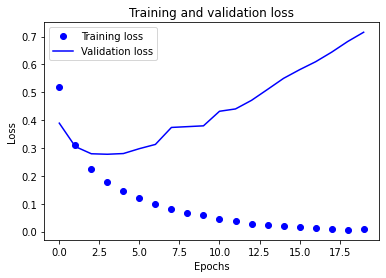

In [24]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = history.epoch

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


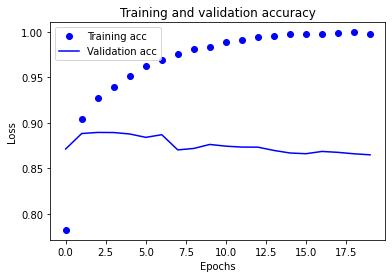

In [30]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']


plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
